In [3]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/hongsukyi/Lectures/main/data/naver_movie_train.txt", sep="\t")

In [4]:
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [5]:
print(len(df))

150000


## 편의상 데이터 개수를 줄여주자.
- 150,000개의 10%인 15,000개를 사용하자.

In [6]:
df=df[:1000]
print(len(df))

1000


In [7]:
# 결측치처리
df.replace("", float("NaN"), inplace=True)
df = df.dropna().reset_index(drop=True)
print('결측치 처리 이후:',len(df))

# 중복 제거
df = df.drop_duplicates(['document']).reset_index(drop=True)
print('중복 제거 이후:',len(df))

# 한글이 아닌 문자 제거
df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
print('한글 아닌 문자 제거 이후:',len(df))

#길이가 짧은 데이터 제거
df['document'] = df['document'].apply(lambda x: ' '.join([token for token in x.split() if len(token) > 2]))
print('리뷰 길이가 짧은 것 제거 :',len(df))


결측치 처리 이후: 1000
중복 제거 이후: 1000
한글 아닌 문자 제거 이후: 1000
리뷰 길이가 짧은 것 제거 : 1000


In [8]:
!pip install konlpy
from konlpy.tag import Okt

In [9]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [10]:
df = list(df['document'])

In [11]:
okt = Okt()
df_token = []

In [12]:
for sentence in df:
    t_okt = okt.morphs(sentence, stem=True) # 토큰화
    t_sentence = [word for word in t_okt if not word in stopwords] # 불용어 제거
    df_token.append(t_sentence)

In [16]:
len(df_token)

1000

In [17]:
print(df_token[:5])

[['더빙', '..', '짜증나다', '목소리'], ['흠', '...', '포스터', '보고', '초딩', '영화', '줄', '....', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'], ['교도소', '이야기', '구먼', '..', '솔직하다', '재미', '없다', '..', '평점'], ['사이', '몬페', '그', '익살스럽다', '연기', '돋보이다', '영화', '!', '스파이더맨', '에서', '늙다', '보이다', '커스틴', '던스트', '너무나도', '이쁘다', '보이다']]


In [18]:
import matplotlib.pyplot as plt

리뷰의 최대 길이 : 55
리뷰의 평균 길이 : 10.352


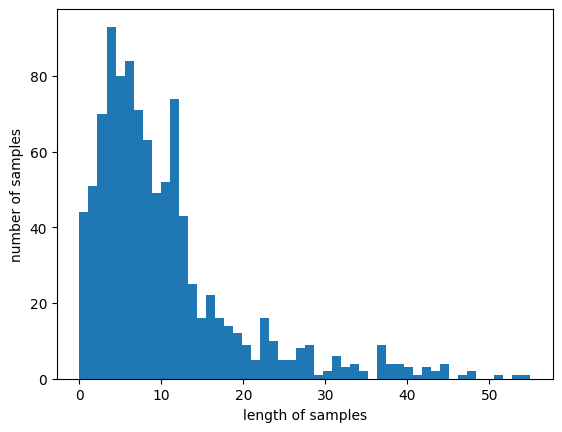

In [20]:
print('리뷰의 최대 길이 :',max(len(review) for review in df_token))
print('리뷰의 평균 길이 :',sum(map(len, df_token))/len(df_token))
plt.hist([len(review) for review in df_token], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [27]:
import gensim      # gensim은 파이썬에서 Word2Vec을 지원한다.
gensim.__version__
from gensim.models import Word2Vec

ModuleNotFoundError: No module named 'numpy.char'